# Sarcasm Detectection: Huffington Post or The Onion? 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

pd.set_option('display.max_colwidth', -1)

## 1. Reading in the dataset

#### Reading in the [dataset](https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection), which comes from Rishabh Misra. It consists of more than 28,000 headlines, all from either Huffington Post or The Onion.

In [2]:
df = pd.read_json(path_or_buf='Sarcasm_Headlines_Dataset_v2.json', lines=True)

#changing the order of columns
df = df[['article_link', 'is_sarcastic', 'headline']]
df

,article_link,is_sarcastic,headline
0,https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205,1,thirtysomething scientists unveil doomsday clock of hair loss
1,https://www.huffingtonpost.com/entry/donna-edwards-inequality_us_57455f7fe4b055bb1170b207,0,"dem rep. totally nails why congress is falling short on gender, racial equality"
2,https://www.huffingtonpost.com/entry/eat-your-veggies-9-delici_b_8899742.html,0,eat your veggies: 9 deliciously different recipes
3,https://local.theonion.com/inclement-weather-prevents-liar-from-getting-to-work-1819576031,1,inclement weather prevents liar from getting to work
4,https://www.theonion.com/mother-comes-pretty-close-to-using-word-streaming-cor-1819575546,1,mother comes pretty close to using word 'streaming' correctly
...,...,...,...
28614,https://www.theonion.com/jews-to-celebrate-rosh-hashasha-or-something-1819564013,1,jews to celebrate rosh hashasha or something
28615,https://local.theonion.com/internal-affairs-investigator-disappointed-conspiracy-d-1819568967,1,internal affairs investigator disappointed conspiracy doesn't go all the way to the top
28616,https://www.huffingtonpost.com/entry/andrew-ahn-independent-spirit-awards_us_58b44741e4b060480e0a2c30,0,the most beautiful acceptance speech this week came from a queer korean
28617,https://www.theonion.com/mars-probe-destroyed-by-orbiting-spielberg-gates-space-1819564363,1,mars probe destroyed by orbiting spielberg-gates space palace


##### Before we see if a model can predict sarcasm, let's see how well a human can. Can you guess whether the following headlines come from Huffington Post or The Onion?

In [3]:
for i in range(33,38):
    print(df.iloc[i,:].headline,"\n")

leading probability researchers confounded by three coworkers wearing same shirt color on same day 

new york introduces shoe-sharing program for city's pedestrians 

beyoncé sculpted in cheese is strangely alluring 

expansive obama state of the union speech to touch on patent law, entomology, the films of robert altman 

stars with gray hair prove getting older isn't all that bad 



#### Here are the answers. How did you do?

In [4]:
for i in range(33,38):
    if df.iloc[i,:].is_sarcastic:
        print("The Onion", "\n")
    else:
        print("Huffington Post", "\n")

The Onion 

The Onion 

Huffington Post 

The Onion 

Huffington Post 



## 2. Exploring the data

#### No Null values. That's good.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
article_link    28619 non-null object
is_sarcastic    28619 non-null int64
headline        28619 non-null object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


#### 48% of articles in the dataset are sarcastic. That means a model that guesses "non-sarcastic" every time will be about 52% accurate. Let's see whether this model can beat 52% accuracy.

In [6]:
df.describe()

,is_sarcastic
count,28619.000000
mean,0.476397
std,0.499451
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


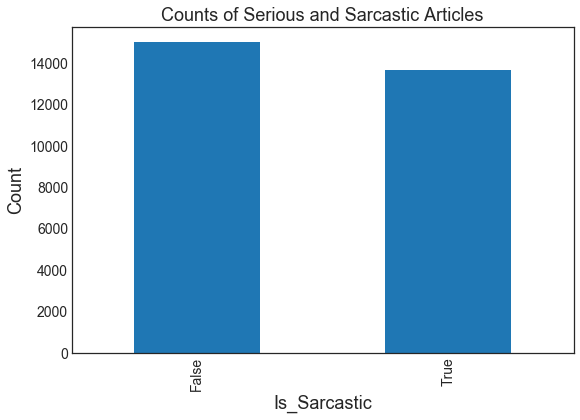

In [7]:
def num_to_bool(num):
    if num == 0:
        return False
    if num == 1:
        return True

counts = df.is_sarcastic.apply(num_to_bool).value_counts()

plt.figure(figsize=(9, 6))
counts.plot(kind='bar', fontsize=14)
plt.title('Counts of Serious and Sarcastic Articles', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel("Is_Sarcastic", fontsize=18)
plt.show()

#### Adding a column for headline length. Can headline length help predict sarcasm?

In [8]:
df['headline_length'] = df.headline.apply(lambda x: len(x.split(" ")))
df

,article_link,is_sarcastic,headline,headline_length
0,https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205,1,thirtysomething scientists unveil doomsday clock of hair loss,8
1,https://www.huffingtonpost.com/entry/donna-edwards-inequality_us_57455f7fe4b055bb1170b207,0,"dem rep. totally nails why congress is falling short on gender, racial equality",13
2,https://www.huffingtonpost.com/entry/eat-your-veggies-9-delici_b_8899742.html,0,eat your veggies: 9 deliciously different recipes,7
3,https://local.theonion.com/inclement-weather-prevents-liar-from-getting-to-work-1819576031,1,inclement weather prevents liar from getting to work,8
4,https://www.theonion.com/mother-comes-pretty-close-to-using-word-streaming-cor-1819575546,1,mother comes pretty close to using word 'streaming' correctly,9
...,...,...,...,...
28614,https://www.theonion.com/jews-to-celebrate-rosh-hashasha-or-something-1819564013,1,jews to celebrate rosh hashasha or something,7
28615,https://local.theonion.com/internal-affairs-investigator-disappointed-conspiracy-d-1819568967,1,internal affairs investigator disappointed conspiracy doesn't go all the way to the top,13
28616,https://www.huffingtonpost.com/entry/andrew-ahn-independent-spirit-awards_us_58b44741e4b060480e0a2c30,0,the most beautiful acceptance speech this week came from a queer korean,12
28617,https://www.theonion.com/mars-probe-destroyed-by-orbiting-spielberg-gates-space-1819564363,1,mars probe destroyed by orbiting spielberg-gates space palace,8


#### The distributions of headline length seem to be very similar...

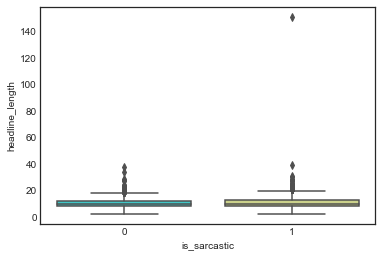

In [9]:
sns.boxplot(x='is_sarcastic', y='headline_length', data=df, palette='rainbow')

#### ... except for one comically long headline from the Onion.

##### Here's the longest headline:

In [10]:
df[df.headline_length == df.headline_length.max()].headline.tolist()[0]

'hot wheels ranked number one toy for rolling down ramp, knocking over dominoes that send marble down a funnel, dropping onto teeter-totter that yanks on string, causing pulley system to raise wooden block, propelling series of twine rollers that unwind spring, launching tennis ball across room, inching tire down slope until it hits power switch, activating table fan that blows toy ship with nail attached to it across kiddie pool, popping water balloon that fills cup, weighing down lever that forces basketball down track, nudging broomstick on axis to rotate, allowing golf ball to roll into sideways coffee mug, which tumbles down row of hardcover books until handle catches hook attached to lever that causes wooden mallet to slam down on serving spoon, catapulting small ball into cup attached by ribbon to lazy susan, which spins until it pushes d battery down incline plane, tipping over salt shaker to season omelet'

##### Here's the shortest headline:

In [11]:
df[df.headline_length == df.headline_length.min()].headline.tolist()[0]

"trump's tailspin"

#### The correlation between headline length and sarcasm is so weak ( r = .072) that it's negligible. So I won't be using headline length in this model.

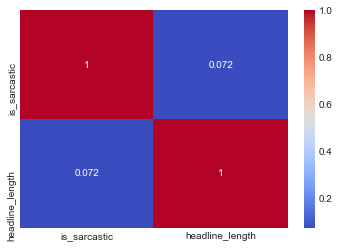

In [12]:
#changing data types to integers
df.is_sarcastic = df.is_sarcastic.astype(int)
df.headline_length = df.headline_length.astype(int)

#generating heatmap
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

## 3. Cleaning the headline text to prepare it for the model

#### Making all text lowercase

In [13]:
#the headlines seem to be lowercase already, but I'll do this just in case.
df['headline_v2'] = df['headline'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df[['headline', 'headline_v2']].head()

,headline,headline_v2
0,thirtysomething scientists unveil doomsday clock of hair loss,thirtysomething scientists unveil doomsday clock of hair loss
1,"dem rep. totally nails why congress is falling short on gender, racial equality","dem rep. totally nails why congress is falling short on gender, racial equality"
2,eat your veggies: 9 deliciously different recipes,eat your veggies: 9 deliciously different recipes
3,inclement weather prevents liar from getting to work,inclement weather prevents liar from getting to work
4,mother comes pretty close to using word 'streaming' correctly,mother comes pretty close to using word 'streaming' correctly


#### Removing punctuation

In [14]:
df['headline_v3'] = df.headline_v2.str.replace('[^\w\s]','')
df[['headline_v2', 'headline_v3']].head()

,headline_v2,headline_v3
0,thirtysomething scientists unveil doomsday clock of hair loss,thirtysomething scientists unveil doomsday clock of hair loss
1,"dem rep. totally nails why congress is falling short on gender, racial equality",dem rep totally nails why congress is falling short on gender racial equality
2,eat your veggies: 9 deliciously different recipes,eat your veggies 9 deliciously different recipes
3,inclement weather prevents liar from getting to work,inclement weather prevents liar from getting to work
4,mother comes pretty close to using word 'streaming' correctly,mother comes pretty close to using word streaming correctly


#### Removing stopwords (the most common English words, such as “the”, “a”, “an”, “in”)

In [15]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['headline_v4'] = df.headline_v3.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df[['headline_v3', 'headline_v4']].head()

,headline_v3,headline_v4
0,thirtysomething scientists unveil doomsday clock of hair loss,thirtysomething scientists unveil doomsday clock hair loss
1,dem rep totally nails why congress is falling short on gender racial equality,dem rep totally nails congress falling short gender racial equality
2,eat your veggies 9 deliciously different recipes,eat veggies 9 deliciously different recipes
3,inclement weather prevents liar from getting to work,inclement weather prevents liar getting work
4,mother comes pretty close to using word streaming correctly,mother comes pretty close using word streaming correctly


#### Lemmatizing - grouping together different forms of the same word so that they are analyzed as one word. For more information, see [this](https://www.geeksforgeeks.org/python-lemmatization-with-nltk/) explanation.

In [16]:
from textblob import Word
df['headline_v5'] = df.headline_v4.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df[['headline_v4', 'headline_v5']][6:7]

,headline_v4,headline_v5
6,5 ways file taxes less stress,5 way file tax le stress


#### Here's the difference between the original headline text and headline_v5.

In [17]:
df[['headline', 'headline_v5']].iloc[0:5]

,headline,headline_v5
0,thirtysomething scientists unveil doomsday clock of hair loss,thirtysomething scientist unveil doomsday clock hair loss
1,"dem rep. totally nails why congress is falling short on gender, racial equality",dem rep totally nail congress falling short gender racial equality
2,eat your veggies: 9 deliciously different recipes,eat veggie 9 deliciously different recipe
3,inclement weather prevents liar from getting to work,inclement weather prevents liar getting work
4,mother comes pretty close to using word 'streaming' correctly,mother come pretty close using word streaming correctly


#### What are the most common words in this dataset?

In [18]:
freq = pd.Series(' '.join(df['headline_v5']).split()).value_counts()[:10]
freq

trump     1794
new       1677
man       1507
woman     959 
say       709 
report    691 
get       637 
u         602 
one       579 
day       571 
dtype: int64

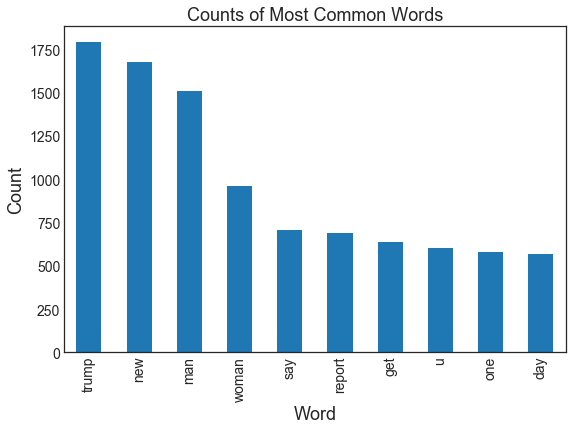

In [19]:
plt.figure(figsize=(9, 6))
freq.plot(kind='bar', fontsize=14)
plt.title('Counts of Most Common Words', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel("Word", fontsize=18)
plt.show()

## 4. Creating a token matrix, training a model, and testing that model's performance

#### Using headline_v5 to predict is_sarcastic

In [20]:
X = df.headline_v5
y = df.is_sarcastic

#### Using CountVectorizer to make a sparse matrix

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X)

#### Training the model on 70% of the headlines and testing it on the remaining 30%

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

#### Fitting a Naive Bayes classification model

In [23]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
predictions = nb.predict(X_test)

## 5. The moment of truth...

In [25]:
from sklearn.metrics import confusion_matrix,classification_report

In [26]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[3699  791]
 [ 942 3154]]


             precision    recall  f1-score   support

          0       0.80      0.82      0.81      4490
          1       0.80      0.77      0.78      4096

avg / total       0.80      0.80      0.80      8586



## This model identifies headlines from both sources with 80% accuracy! 
While 80% accuracy is far from perfect, it is certainly better than the 52% accuracy we established as the baseline earlier. 

How does this model's accuracy compare to your own? If you correctly guessed the source for all five headlines in the beginning of this notebook, then congratulations, you beat the bot! If you only guessed three correctly, then maybe you should leave the prediction to this model.

(And if you guessed two or fewer correctly, then maybe you should read the news more often.)

## Next steps for improving the accuracy of this model could include:
- More lemmatization
- Term Frequency-Inverse Document Frequency
- Alternative classification models
- Scraping text from the articles and training the model on that text, in addition to headlines